In [6]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-21 05:08:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.6MB/s    in 3.2s    

2023-06-21 05:08:19 (32.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [9]:
steak_images_train=len(os.listdir("pizza_steak/train/steak"))
steak_images_train

750

In [10]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[0:]
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print("Shape of image:",img.shape)
  return img

['1895479.jpg']
Shape of image: (306, 512, 3)


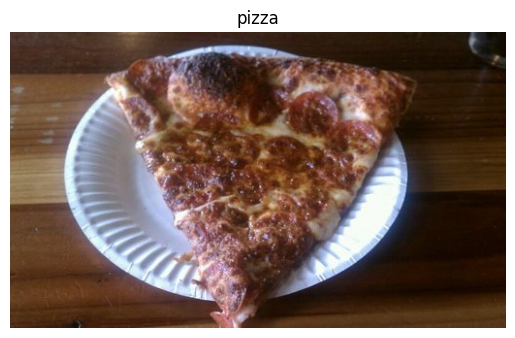

In [12]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[75, 53, 42],
        [74, 52, 41],
        [74, 52, 41],
        ...,
        [16, 12,  3],
        [16, 11,  5],
        [15, 10,  4]],

       [[77, 55, 44],
        [77, 55, 44],
        [78, 56, 45],
        ...,
        [16, 12,  3],
        [16, 11,  5],
        [15, 10,  4]],

       [[76, 54, 43],
        [78, 56, 45],
        [80, 58, 47],
        ...,
        [16, 12,  3],
        [16, 12,  3],
        [15, 10,  4]],

       ...,

       [[81, 45, 29],
        [86, 50, 34],
        [91, 55, 39],
        ...,
        [85, 54, 25],
        [86, 55, 26],
        [85, 54, 25]],

       [[77, 46, 26],
        [81, 50, 30],
        [84, 53, 33],
        ...,
        [83, 54, 24],
        [82, 53, 23],
        [79, 50, 20]],

       [[71, 40, 20],
        [72, 41, 21],
        [73, 42, 22],
        ...,
        [83, 54, 24],
        [82, 53, 23],
        [79, 50, 20]]], dtype=uint8)>

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
#set seed
tf.random.set_seed(42)

#Preprocess data
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#set up paths to our data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#Build a CNN model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 35s 500ms/step - loss: 0.5574 - accuracy: 0.7127 - val_loss: 0.4789 - val_accuracy: 0.7753
Epoch 2/5
47/47 [==============================] - 17s 356ms/step - loss: 0.4489 - accuracy: 0.8007 - val_loss: 0.4030 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 16s 351ms/step - loss: 0.4265 - accuracy: 0.8107 - val_loss: 0.3766 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 16s 351ms/step - loss: 0.3822 - accuracy: 0.8367 - val_loss: 0.3016 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 17s 373ms/step - loss: 0.2997 - accuracy: 0.8813 - val_loss: 0.2544 - val_accuracy: 0.9033


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [17]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 17s 340ms/step - loss: 2.0514 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 333ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 335ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 16s 346ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 16s 337ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 343ms/step - loss: 3.4065 - accuracy: 0.6227 - val_loss: 0.6683 - val_accuracy: 0.7573
Epoch 2/5
47/47 [==============================] - 16s 340ms/step - loss: 0.7732 - accuracy: 0.7347 - val_loss: 1.4381 - val_accuracy: 0.6160
Epoch 3/5
47/47 [==============================] - 16s 336ms/step - loss: 0.8928 - accuracy: 0.6940 - val_loss: 0.4637 - val_accuracy: 0.7947
Epoch 4/5
47/47 [==============================] - 19s 408ms/step - loss: 0.5469 - accuracy: 0.7580 - val_loss: 0.5973 - val_accuracy: 0.7687
Epoch 5/5
47/47 [==============================] - 16s 339ms/step - loss: 0.5483 - accuracy: 0.7760 - val_loss: 0.3875 - val_accuracy: 0.8347


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['660900.jpg']
Shape of image: (512, 512, 3)
['1761451.jpg']
Shape of image: (384, 512, 3)


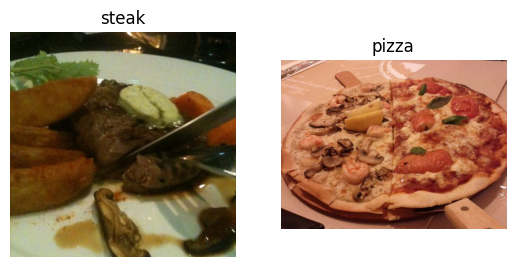

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=view_random_image("pizza_steak/train/","pizza")

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images,labels=train_data.next()

In [25]:
images[:2],images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [26]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [28]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [29]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [30]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      )

Epoch 1/5
47/47 [==============================] - 17s 301ms/step - loss: 2.7297 - accuracy: 0.5873 - val_loss: 0.5760 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.5190 - accuracy: 0.7487 - val_loss: 0.4502 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3472 - accuracy: 0.8580 - val_loss: 0.5337 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.1856 - accuracy: 0.9467 - val_loss: 0.4720 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.0968 - accuracy: 0.9807 - val_loss: 0.6908 - val_accuracy: 0.7000


<Axes: >

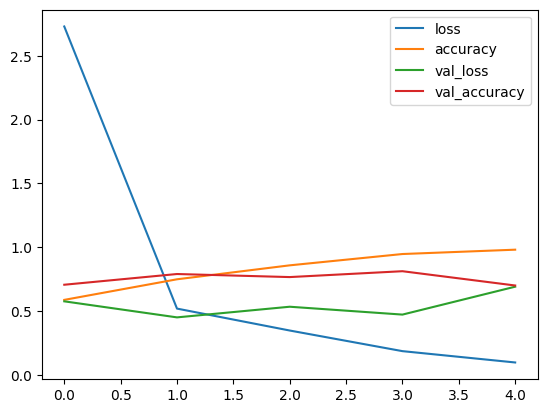

In [32]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [33]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="accuracy_loss")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


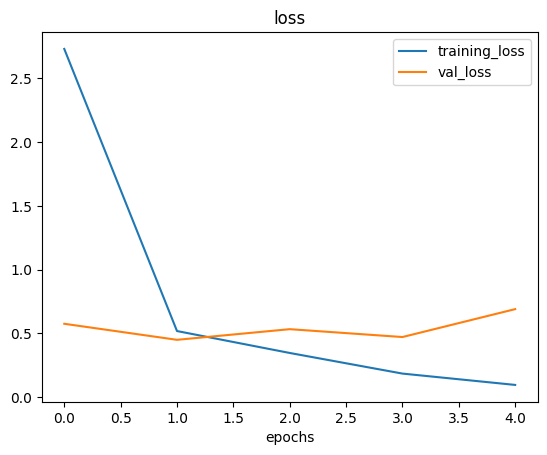

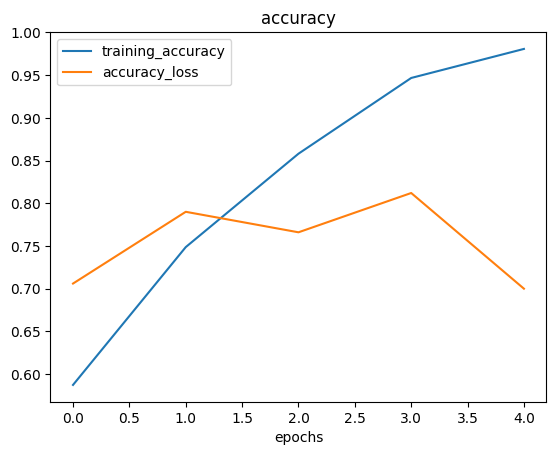

In [34]:
plot_loss_curves(history_4)

In [35]:
model_5=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [36]:
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [37]:
history_5=model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 348ms/step - loss: 0.6177 - accuracy: 0.6673 - val_loss: 0.4749 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 16s 344ms/step - loss: 0.4667 - accuracy: 0.7847 - val_loss: 0.4918 - val_accuracy: 0.7787
Epoch 3/5
47/47 [==============================] - 30s 651ms/step - loss: 0.4292 - accuracy: 0.8093 - val_loss: 0.3996 - val_accuracy: 0.8293
Epoch 4/5
47/47 [==============================] - 16s 344ms/step - loss: 0.3931 - accuracy: 0.8307 - val_loss: 0.3710 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 20s 431ms/step - loss: 0.3662 - accuracy: 0.8453 - val_loss: 0.3162 - val_accuracy: 0.8793


In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

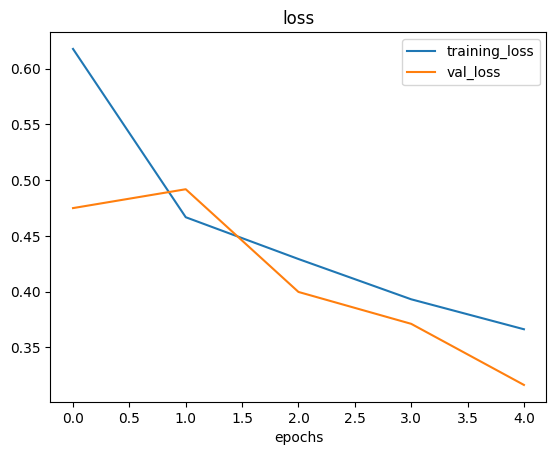

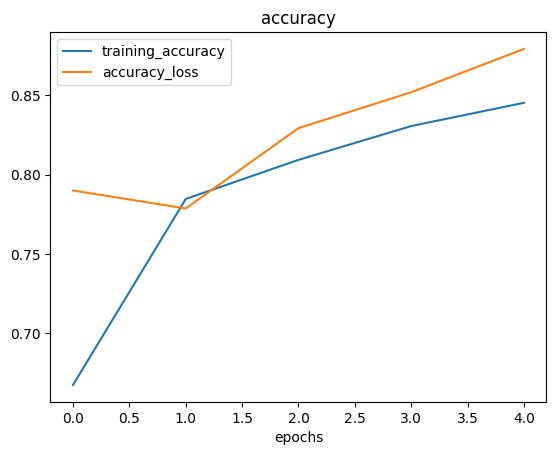

In [39]:
plot_loss_curves(history_5)

In [40]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255,rotation_range=0.2,
                                           shear_range=0.2,zoom_range=0.2,
                                           width_shift_range=0.2,horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [41]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

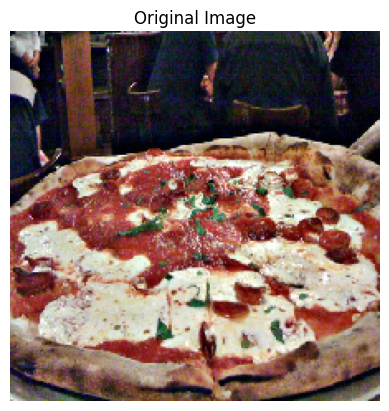

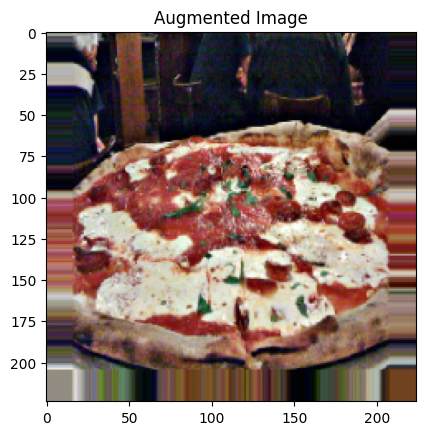

In [43]:
import random
random_number=random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis()

In [44]:
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 30s 599ms/step - loss: 0.7081 - accuracy: 0.3773 - val_loss: 0.6926 - val_accuracy: 0.4940
Epoch 2/5
47/47 [==============================] - 29s 624ms/step - loss: 0.6942 - accuracy: 0.4707 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 27s 567ms/step - loss: 0.6938 - accuracy: 0.5680 - val_loss: 0.6866 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 27s 568ms/step - loss: 0.6878 - accuracy: 0.5987 - val_loss: 0.6748 - val_accuracy: 0.6260
Epoch 5/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6759 - accuracy: 0.5593 - val_loss: 0.6513 - val_accuracy: 0.6700


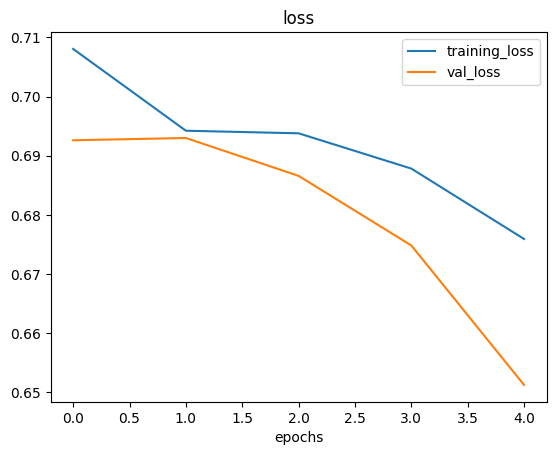

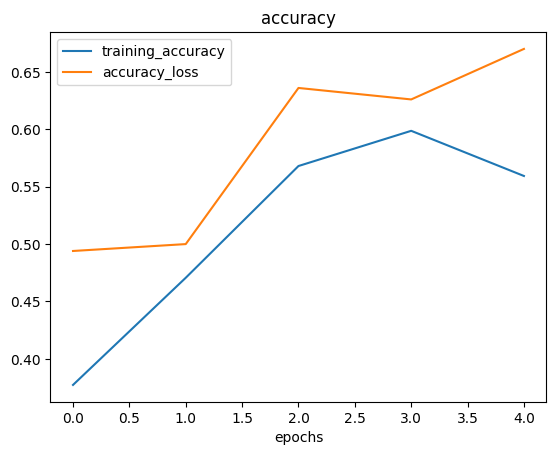

In [45]:
plot_loss_curves(history_6)

In [46]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224,224),
                                                                       class_mode="binary",
                                                                       batch_size=32,
                                                                       shuffle=True)


Found 1500 images belonging to 2 classes.


In [47]:
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_7=model_7.fit(train_data_augmented_shuffled ,epochs=5,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 628ms/step - loss: 0.6792 - accuracy: 0.5433 - val_loss: 0.6049 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.5400 - accuracy: 0.7367 - val_loss: 0.4171 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 27s 577ms/step - loss: 0.4990 - accuracy: 0.7647 - val_loss: 0.3784 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 29s 611ms/step - loss: 0.4972 - accuracy: 0.7607 - val_loss: 0.4048 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 27s 568ms/step - loss: 0.4670 - accuracy: 0.7880 - val_loss: 0.4016 - val_accuracy: 0.8240


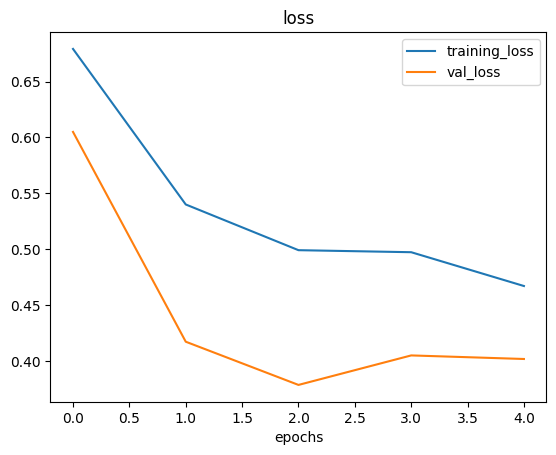

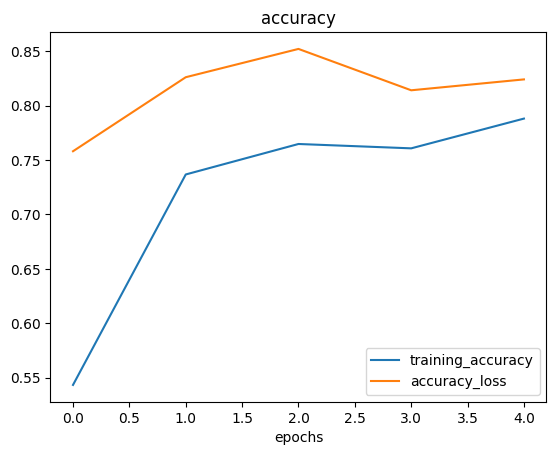

In [48]:
plot_loss_curves(history_7)

--2023-06-21 05:22:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-06-21 05:22:48 (89.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

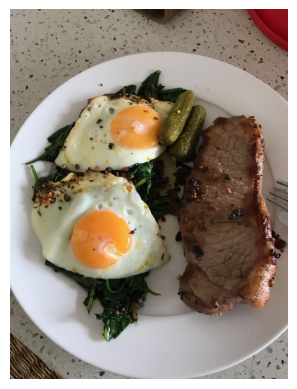

In [49]:
#trying the model on custom data
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [50]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [51]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,[img_shape,img_shape])
  img=img/255
  return img

In [52]:
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [53]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
class_names

1/1 [==============================] - 0s 185ms/step


array(['pizza', 'steak'], dtype='<U5')

In [54]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [55]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step


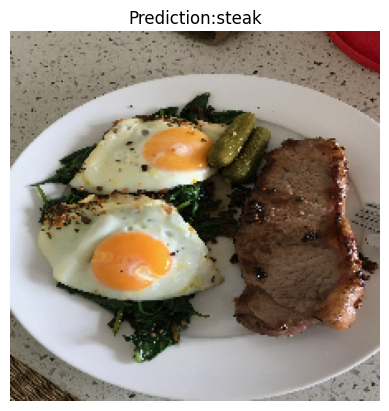

In [56]:
pred_and_plot(model_7,"03-steak.jpeg")

In [57]:
#Multi class classification

In [58]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-21 05:22:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.4MB/s    in 13s     

2023-06-21 05:23:05 (39.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [59]:
import os
for dirpath,dirname,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 1

In [60]:
#setup train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [61]:
#get class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['853441.jpg']
Shape of image: (512, 384, 3)


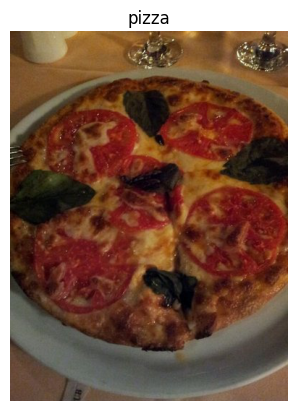

In [62]:
import random
img=view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [63]:
#preprocessing data

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=train_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(10,activation="softmax")
])
model_8.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [73]:
history_8=model_8.fit(train_data,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

235/235 [==============================] - 60s 256ms/step - loss: 1.9537 - accuracy: 0.3113 - val_loss: 1.9376 - val_accuracy: 0.3200


In [74]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 170ms/step - loss: 1.9376 - accuracy: 0.3200


[1.937551736831665, 0.3199999928474426]

In [79]:
#trying a simpler model
model_9=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [80]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [81]:
history_9=model_9.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 241ms/step - loss: 2.0984 - accuracy: 0.2464 - val_loss: 1.9400 - val_accuracy: 0.3248
Epoch 2/5
235/235 [==============================] - 54s 230ms/step - loss: 1.7509 - accuracy: 0.4071 - val_loss: 1.8101 - val_accuracy: 0.3728
Epoch 3/5
235/235 [==============================] - 53s 228ms/step - loss: 1.4465 - accuracy: 0.5264 - val_loss: 1.8511 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 53s 227ms/step - loss: 1.0609 - accuracy: 0.6660 - val_loss: 1.9419 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 69s 291ms/step - loss: 0.6755 - accuracy: 0.8071 - val_loss: 2.1532 - val_accuracy: 0.3408


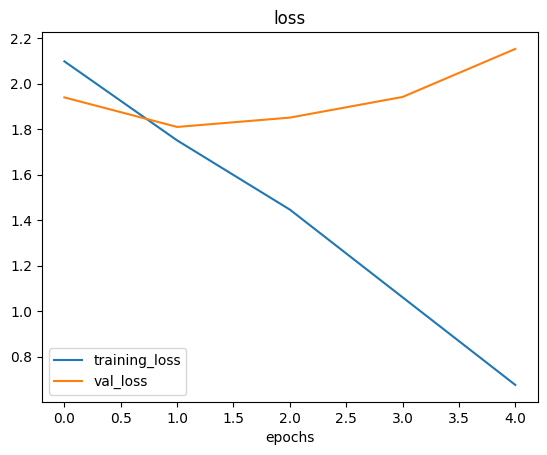

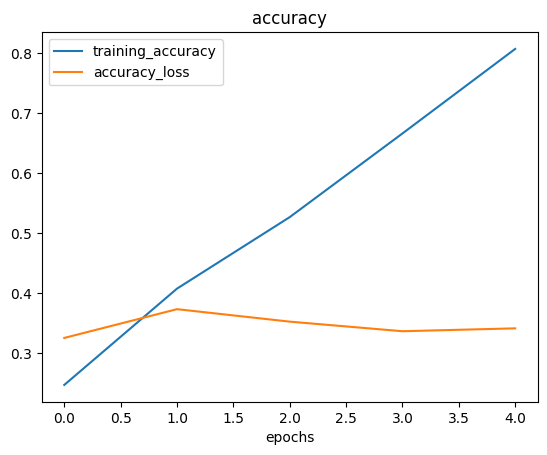

In [82]:
plot_loss_curves(history_9)

In [83]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [85]:
model_10=tf.keras.models.clone_model(model_8)

In [86]:
model_10.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [87]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_24 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [88]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_24 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [90]:
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 152s 638ms/step - loss: 2.2277 - accuracy: 0.1739 - val_loss: 2.0870 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 130s 555ms/step - loss: 2.1373 - accuracy: 0.2301 - val_loss: 2.0084 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 139s 590ms/step - loss: 2.0943 - accuracy: 0.2472 - val_loss: 1.9743 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0442 - accuracy: 0.2719 - val_loss: 1.9118 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 137s 584ms/step - loss: 2.0182 - accuracy: 0.2867 - val_loss: 1.8772 - val_accuracy: 0.3396


In [91]:
model_8.evaluate(test_data)

79/79 [==============================] - 15s 184ms/step - loss: 1.9376 - accuracy: 0.3200


[1.937551736831665, 0.3199999928474426]

In [92]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8772 - accuracy: 0.3396


[1.877220869064331, 0.33959999680519104]

In [93]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [94]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 326ms/step


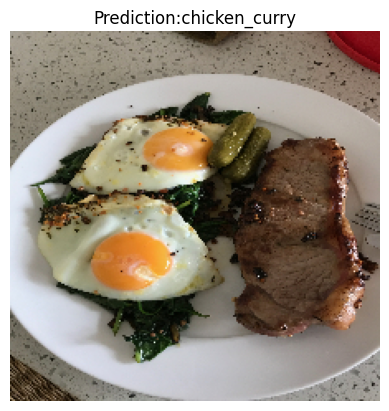

In [95]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

In [99]:
def pred_and_plot(model,filename,class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0])>1:
    pred_class=class_names[pred.argmax()]
  else:
    pred_class=class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 35ms/step


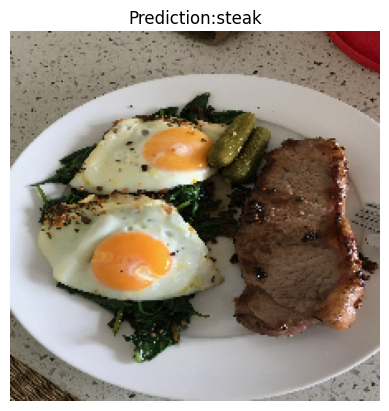

In [101]:
pred_and_plot(model_10, "03-steak.jpeg", class_names)

In [102]:
model_10.save("saved_trained_model_10")

In [103]:
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 169ms/step - loss: 1.8772 - accuracy: 0.3396


[1.8772211074829102, 0.33959999680519104]

In [104]:
model_10.evaluate(test_data)

79/79 [==============================] - 14s 177ms/step - loss: 1.8772 - accuracy: 0.3396


[1.8772213459014893, 0.33959999680519104]